## 2. Applied Question #10 on page 130 of ISLR Python

### Load functions, libraries, and data.

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm 

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)


In [2]:
from ISLP import load_data
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

### Create Dataframe with Predictors

In [3]:
X = pd.DataFrame({'Price': Carseats['Price'],
                  'Urban': Carseats['Urban'],
                  'US': Carseats['US']})
X[:4]

,Price,Urban,US
0,120,Yes,Yes
1,83,Yes,Yes
2,80,Yes,Yes
3,97,Yes,Yes


### Create Model for Sales with Price, Urban, and US

In [4]:
y = Carseats['Sales']
X = MS(['Price', 'Urban', 'US']).fit_transform(Carseats)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)


,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


In [5]:
results1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           2.39e-23
Time:                        15:53:19   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Create Model for Sales with Price and US

In [6]:
y = Carseats['Sales']
X = MS(['Price', 'US']).fit_transform(Carseats)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)


,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


In [7]:
results1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           2.66e-24
Time:                        15:53:19   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US[Yes]        1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

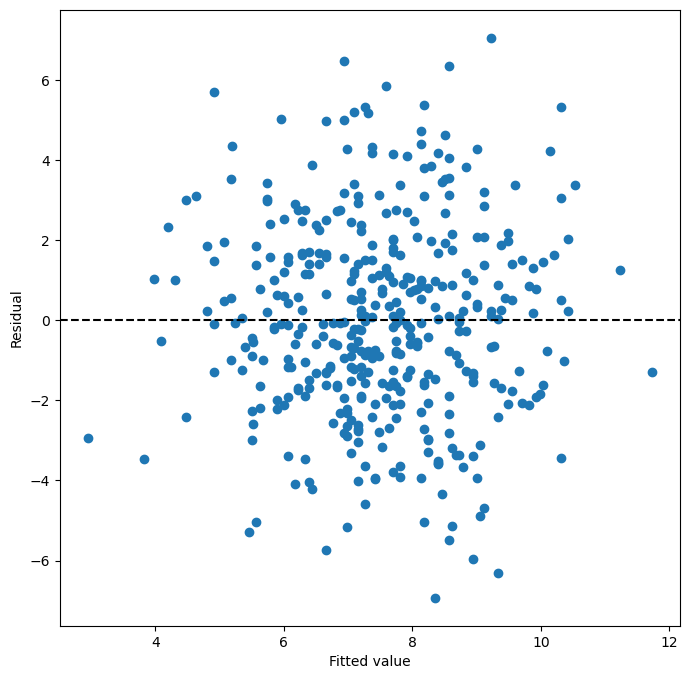

In [8]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results1.fittedvalues, results1.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

42

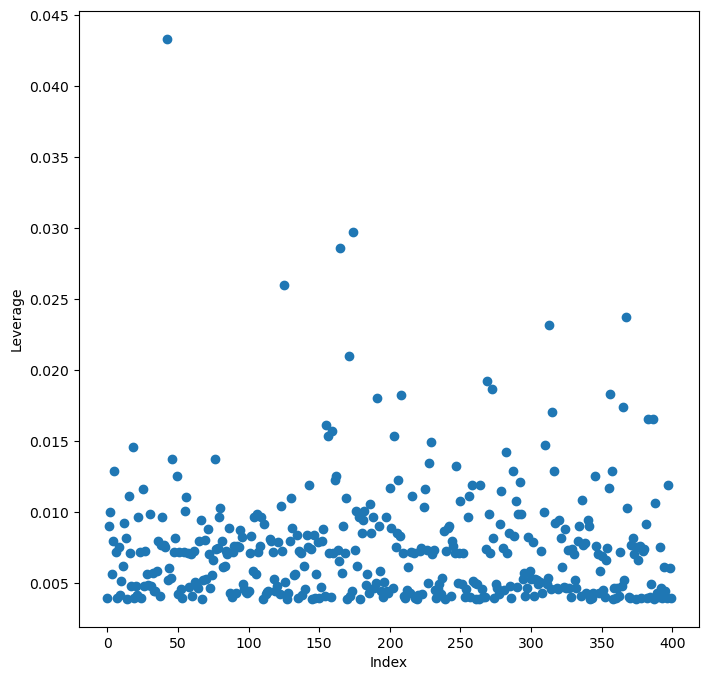

In [9]:
infl = results1.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

# 3. Regression with Abalone Dataset competition

In [10]:
# Import and view the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

abalone = pd.read_csv('train.csv')
print(abalone['Sex'].value_counts())

abalone = pd.get_dummies(abalone, columns=['Sex'], drop_first = False)
abalone

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64


,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,True,False,False
1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,True,False,False
2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,False,True,False
3,3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,False,False,True
4,4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
90610,90610,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6,False,False,True
90611,90611,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9,False,False,True
90612,90612,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6,False,True,False
90613,90613,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6,False,True,False


## Data Visualization

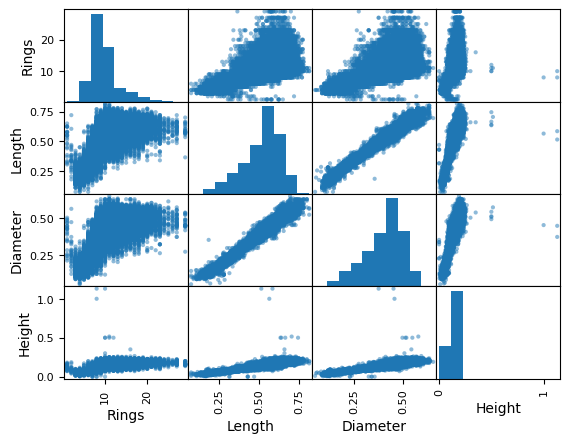

In [11]:
pd.plotting.scatter_matrix(abalone[['Rings',
                                 'Length',
                                 'Diameter',
                                   'Height']]);

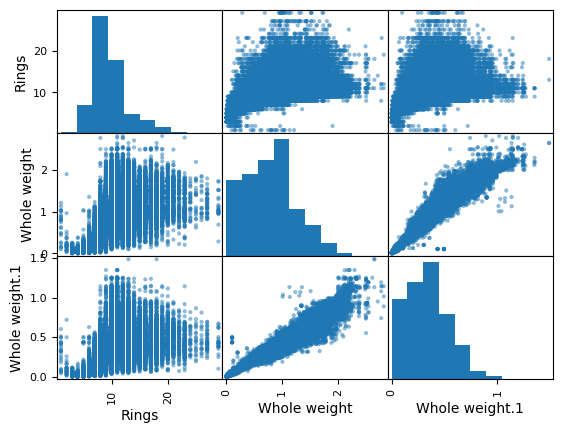

In [12]:
pd.plotting.scatter_matrix(abalone[['Rings',
                                 'Whole weight',
                                 'Whole weight.1']]);

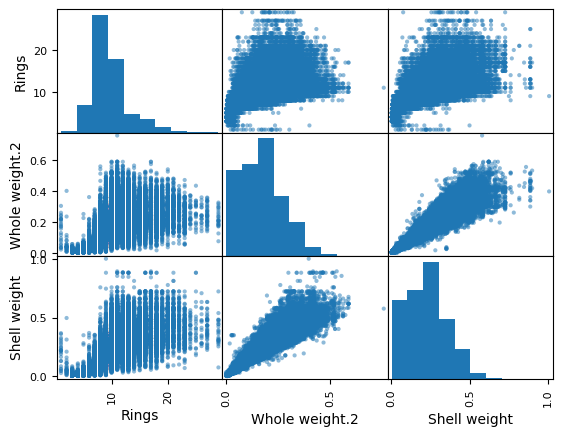

In [13]:
pd.plotting.scatter_matrix(abalone[['Rings',
                                 'Whole weight.2',
                                 'Shell weight']]);

# Model 1

### 1 Degree Linear Model

In [14]:
y = abalone['Rings']
minus_rings = abalone.columns.drop(['Rings', 'id', 'Sex_I'])
X = MS(minus_rings).fit_transform(abalone)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                 1.546e+04
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:53:46   Log-Likelihood:            -1.9115e+05
No. Observations:               90615   AIC:                         3.823e+05
Df Residuals:                   90605   BIC:                         3.824e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          3.1299      0.054     57.827      0.000       3.024       3.236
Length            -2.0755      0.401     -5.174      0.000      -2.862      -1.289
Diameter           8.0525      0.498     16.166      0.000       7.076       9.029
Height            21.1566      0.487     43.409      0.000      20.201      22.112
Whole weight       3.7713      0.120     31.300      0.000       3.535       4.007
Whole weight.1   -15.8048      0.150   -105.238      0.000     -16.099     -15.510
Whole weight.2    -7.0188      0.294    -23.858      0.000      -7.595      -6.442
Shell weight      20.7567      0.218     95.231      0.000      20.329      21.184
Sex_F              0.7170      0.021     33.714      0.000       0.675       0.759
Sex_M              0.7024      0.020     35.403      0.000       0.664       0.741
==============================================================================
Omnibus:                    29853.853   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           192964.945
Skew:                           1.433   Prob(JB):                         0.00
Kurtosis:                       9.549   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

16384

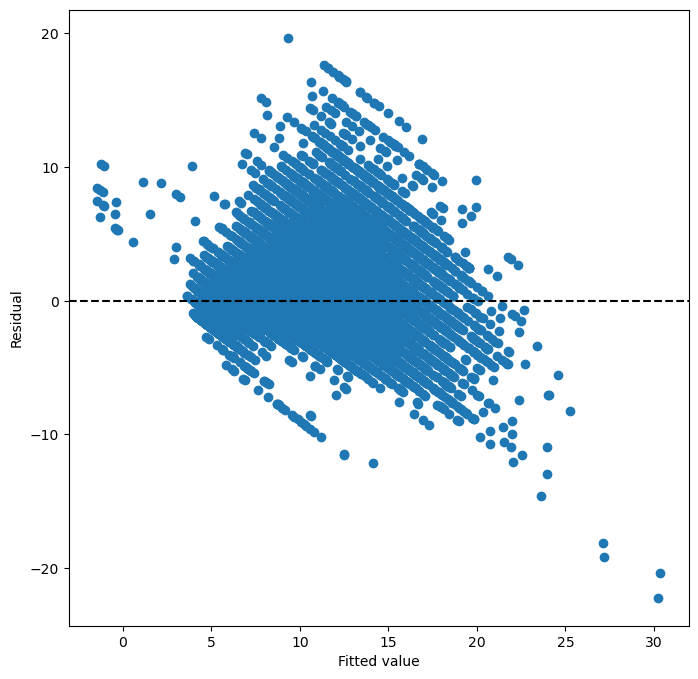

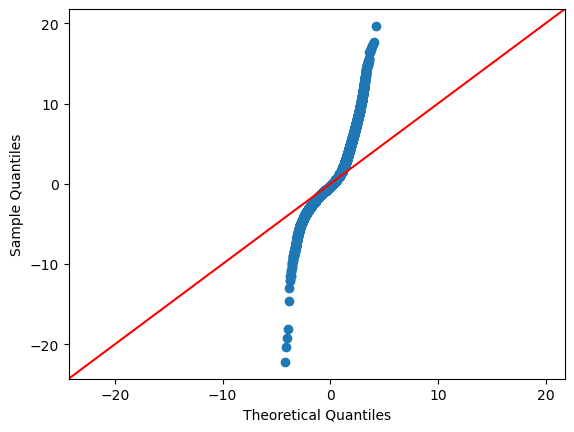

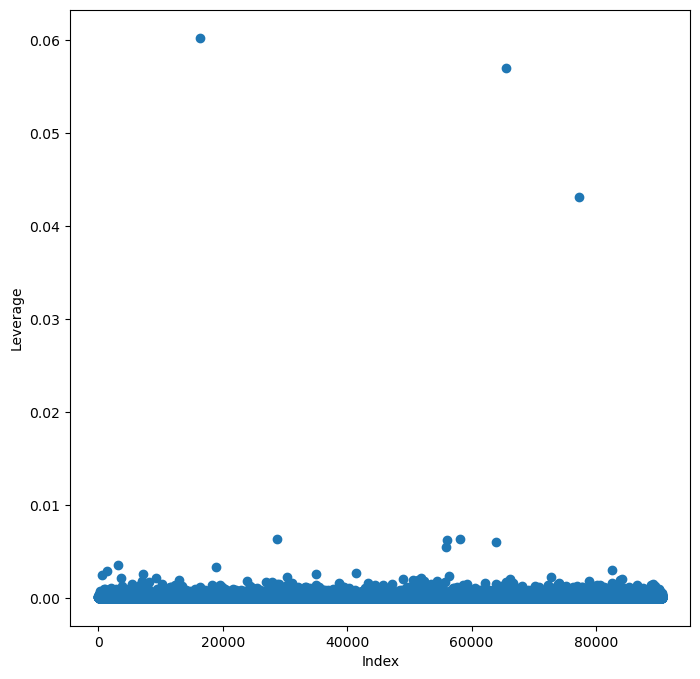

In [15]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

sm.qqplot(results.resid, line ='45') 

infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

### 2 Degree Linear Model

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
y = abalone['Rings']
X = abalone[['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Sex_F', 'Sex_M']]

polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X)
xPoly_names = polyFeatures.get_feature_names_out(X.columns)
Xnew = pd.DataFrame(xPoly, columns = xPoly_names)
Xnew = sm.add_constant(Xnew)
model = sm.OLS(y, Xnew)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     3136.
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:53:48   Log-Likelihood:            -1.8720e+05
No. Observations:               90615   AIC:                         3.745e+05
Df Residuals:                   90563   BIC:                         3.750e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0308      0.209      0.147      0.883      -0.379       0.441
Length                            6.4213      2.820      2.277      0.023       0.894      11.948
Diameter                         27.2211      3.520      7.734      0.000      20.323      34.119
Height                           14.6808      4.518      3.249      0.001       5.826      23.536
Whole weight                      4.8144      1.374      3.504      0.000       2.122       7.507
Whole weight.1                  -15.6466      1.723     -9.079      0.000     -19.024     -12.269
Whole weight.2                    3.3601      4.100      0.820      0.412      -4.675      11.395
Shell weight                     15.8075      2.703      5.847      0.000      10.509      21.106
Sex_F                             0.8941      0.140      6.370      0.000       0.619       1.169
Sex_M                             0.1056      0.096      1.100      0.271      -0.082       0.294
Length^2                         19.0568      9.959      1.914      0.056      -0.462      38.576
Length Diameter                 -68.7068     22.152     -3.102      0.002    -112.124     -25.290
Length Height                   -20.8153     25.371     -0.820      0.412     -70.543      28.913
Length Whole weight              -2.2192      5.713     -0.388      0.698     -13.416       8.978
Length Whole weight.1            22.3054      7.339      3.039      0.002       7.922      36.689
Length Whole weight.2            -8.7124     14.772     -0.590      0.555     -37.665      20.240
Length Shell weight             -37.8567     10.645     -3.556      0.000     -58.722     -16.992
Length Sex_F                     -1.8541      1.302     -1.424      0.154      -4.406       0.697
Length Sex_M                      1.7053      1.209      1.411      0.158      -0.664       4.075
Diameter^2                      -26.0547     15.130     -1.722      0.085     -55.708       3.599
Diameter Height                  29.3696     31.507      0.932      0.351     -32.385      91.124
Diameter Whole weight            21.4145      6.802      3.148      0.002       8.083      34.746
Diameter Whole weight.1         -35.4987      8.891     -3.993      0.000     -52.924     -18.073
Diameter Whole weight.2          13.0576     17.847      0.732      0.464     -21.923      48.038
Diameter Shell weight            72.0049     11.949      6.026      0.000      48.585      95.425
Diameter Sex_F                   -0.8411      1.621     -0.519      0.604      -4.017       2.335
Diameter Sex_M                   -1.0214      1.528     -0.668      0.504      -4.016       1.974
Height^2                        -11.4968      1.541     -7.458      0.000     -14.518      -8.476
Height Whole weight               5.7558     

### Selecting Variables by Removing Insignificant Variables

In [18]:
y = abalone['Rings']
X = abalone[['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Sex_F', 'Sex_M']]

polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X)
xPoly_names = polyFeatures.get_feature_names_out(X.columns)
Xnew = pd.DataFrame(xPoly, columns = xPoly_names)

X_drops = Xnew.columns.drop(['Length Whole weight', 'Diameter Whole weight.2', 
                             'Length Height', 'Whole weight^2', 'Whole weight.1 Shell weight', 
                             'Height Whole weight', 'Diameter^2', 'Length', 'Diameter Height',
                            'Whole weight Whole weight.2', 'Diameter Sex_F', 'Diameter Sex_M', 
                             'Sex_F Sex_M', 'Length Whole weight.2', 'Sex_M^2', 'Sex_M', 'Whole weight.2', 
                            'Height Whole weight.2'])
X_drops
X3 = MS(X_drops).fit_transform(Xnew)
X3
model = sm.OLS(y, X3)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     4569.
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:53:48   Log-Likelihood:            -1.8722e+05
No. Observations:               90615   AIC:                         3.745e+05
Df Residuals:                   90579   BIC:                         3.748e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                         0.2051      0.187      1.099      0.272      -0.161       0.571
Diameter                         34.2492      1.817     18.847      0.000      30.687      37.811
Height                           15.2988      1.317     11.618      0.000      12.718      17.880
Whole weight                      5.7285      0.785      7.296      0.000       4.190       7.267
Whole weight.1                  -15.6652      1.366    -11.470      0.000     -18.342     -12.988
Shell weight                     15.8645      2.272      6.982      0.000      11.411      20.318
Sex_F                             0.8337      0.119      7.021      0.000       0.601       1.066
Length^2                         44.3993      2.694     16.478      0.000      39.118      49.680
Length Diameter                -119.8382      5.808    -20.633      0.000    -131.222    -108.454
Length Whole weight.1            13.4695      4.086      3.296      0.001       5.460      21.479
Length Shell weight             -48.1566      6.585     -7.313      0.000     -61.063     -35.250
Length Sex_F                     -2.0546      0.665     -3.087      0.002      -3.359      -0.750
Length Sex_M                      1.5416      0.381      4.050      0.000       0.796       2.288
Diameter Whole weight            16.9672      2.370      7.160      0.000      12.323      21.612
Diameter Whole weight.1         -22.0283      5.450     -4.042      0.000     -32.711     -11.346
Diameter Shell weight            86.2085      8.317     10.365      0.000      69.907     102.510
Height^2                        -12.5712      1.474     -8.528      0.000     -15.460      -9.682
Height Whole weight.1           -68.0514      4.590    -14.827      0.000     -77.047     -59.056
Height Shell weight              95.8561      7.345     13.050      0.000      81.460     110.252
Height Sex_F                      4.5091      1.571      2.870      0.004       1.430       7.588
Height Sex_M                      5.4737      1.534      3.568      0.000       2.467       8.481
Whole weight Whole weight.1     -13.7644      0.834    -16.505      0.000     -15.399     -12.130
Whole weight Shell weight        -9.1003      1.311     -6.943      0.000     -11.669      -6.531
Whole weight Sex_F                2.3904      0.447      5.352      0.000       1.515       3.266
Whole weight Sex_M                2.3426      0.437      5.356      0.000       1.485       3.200
Whole weight.1^2                 31.5231      0.950     33.188      0.000      29.661      33.385
Whole weight.1 Whole weight.2    16.4077      3.060      5.361      0.000      10.409      22.406
Whole weight.1 Sex_F             -7.1685      0.593    -12.084      0.000      -8.331      -6.006
Whole weight.1 Sex_M             -7.8725     

## Model Evaluation

16384

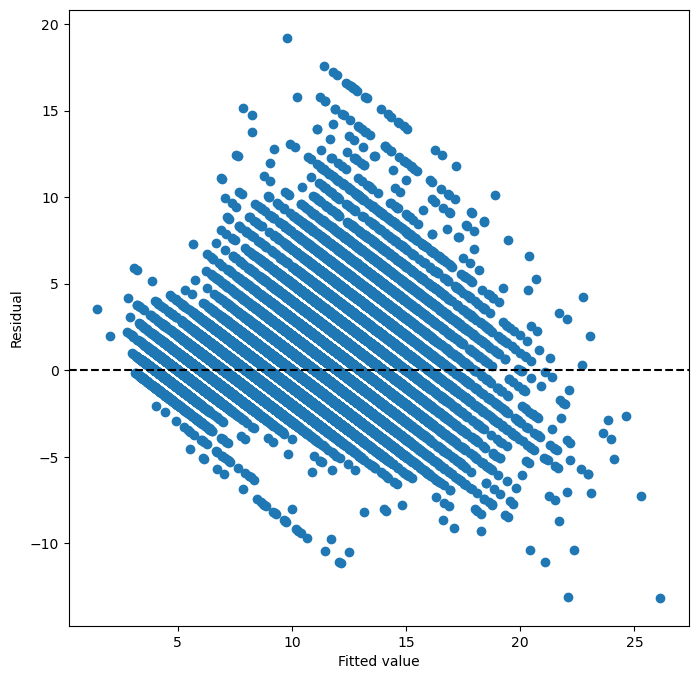

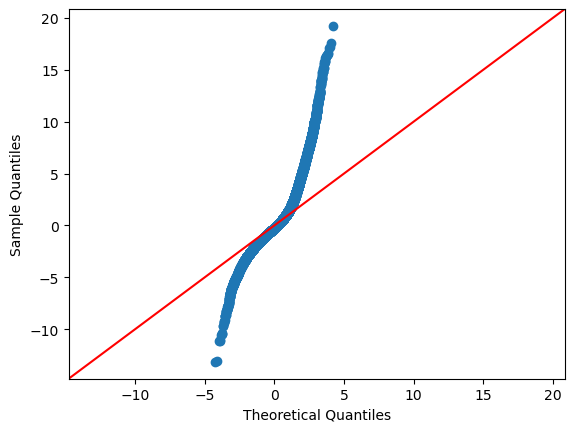

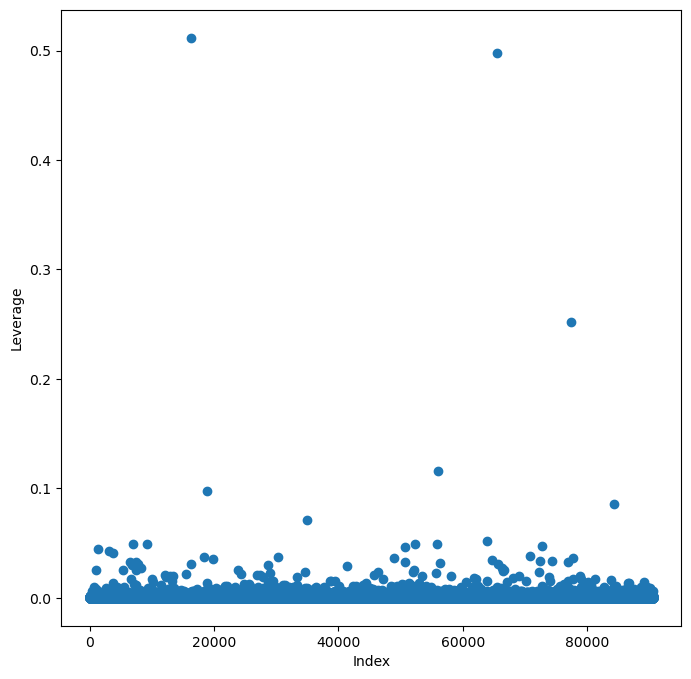

In [19]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

sm.qqplot(results.resid, line ='45') 

infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

## Applying Model on Test Data

In [20]:
test = pd.read_csv('test.csv')

test = pd.get_dummies(test, columns=['Sex'], drop_first = False)
test

XTest = test[['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Sex_F', 'Sex_M']]

polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(XTest)
xPoly_names = polyFeatures.get_feature_names_out(XTest.columns)
XTest = pd.DataFrame(xPoly, columns = xPoly_names)
XTest = MS(X_drops).fit_transform(XTest)

Rings = round(results.predict(XTest), 0)

output = pd.DataFrame(test[['id']])
output['Rings'] = Rings
print(output)
output.to_csv('model1.csv', index = False)

           id  Rings
0       90615    9.0
1       90616   10.0
2       90617   10.0
3       90618   10.0
4       90619    8.0
...       ...    ...
60406  151021    6.0
60407  151022    9.0
60408  151023   12.0
60409  151024   13.0
60410  151025    9.0

[60411 rows x 2 columns]


# Model 2  

Model 1 does not have normal residuals so a different selection of features is required. 

In [21]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

### 3rd Degree, n = 10

In [22]:
y = abalone['Rings']
X = abalone[['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Sex_F', 'Sex_M']]

polyFeatures = PolynomialFeatures(degree=3, include_bias=False)
xPoly = polyFeatures.fit_transform(X)
xPoly_names = polyFeatures.get_feature_names_out(X.columns)
Xnew = pd.DataFrame(xPoly, columns = xPoly_names)
#model = sm.OLS(y, Xnew)
#results = model.fit()
#results.summary()

# https://www.kaggle.com/code/jorijnsmit/linear-regression-by-sequential-feature-selection#Fitting-a-Linear-Regression-Model 
lr = LinearRegression()

# http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/#sequentialfeatureselector
sfs = SFS(lr,
          k_features=10,
          verbose=1,
          forward=True, 
          scoring='r2',
          cv=5,
          n_jobs=10)

sfs = sfs.fit(Xnew, y)




[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    3.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 219 out of 219 | elapsed:    6.2s finished
Features: 1/10[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.7s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 218 out of 218 | elapsed:    4.8s finished
Features: 2/10[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    5.1s
[Parallel(n_jobs=10)]: Done 217 out of 217 | elapsed:    6.0s finished
Features: 3/10[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    1.0s
[Pa

In [23]:
X_sfs = sfs.transform(Xnew)

X_sfs_names = sfs.k_feature_idx_
X_sfs_names = Xnew.columns[list(X_sfs_names)]
print(X_sfs_names)

X_sfs = sm.add_constant(X_sfs)
model = sm.OLS(y, X_sfs)
results = model.fit()
results.summary()


Index(['Height', 'Shell weight', 'Whole weight.1 Shell weight',
       'Length^2 Whole weight', 'Length^2 Whole weight.1',
       'Length Whole weight^2', 'Length Whole weight.1^2',
       'Height^2 Whole weight.2', 'Height^2 Shell weight', 'Whole weight.1^3'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                 1.550e+04
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:55:19   Log-Likelihood:            -1.8811e+05
No. Observations:               90615   AIC:                         3.762e+05
Df Residuals:                   90604   BIC:                         3.764e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2335      0.044     72.725      0.000       3.146       3.321
x1            20.6714      0.646     32.000      0.000      19.405      21.937
x2            37.8114      0.462     81.833      0.000      36.906      38.717
x3           -34.4387      0.948    -36.327      0.000     -36.297     -32.581
x4            47.4255      0.933     50.822      0.000      45.597      49.255
x5          -169.9376      2.535    -67.028      0.000    -174.907    -164.968
x6            -8.1008      0.217    -37.325      0.000      -8.526      -7.675
x7           126.9424      2.445     51.910      0.000     122.149     131.735
x8          -191.3251      8.482    -22.557      0.000    -207.949    -174.701
x9            95.3543      7.631     12.495      0.000      80.397     110.311
x10          -25.2224      0.776    -32.496      0.000     -26.744     -23.701
==============================================================================
Omnibus:                    30838.699   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           188712.424
Skew:                           1.506   Prob(JB):                         0.00
Kurtosis:                       9.396   Cond. No.                     2.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

65464

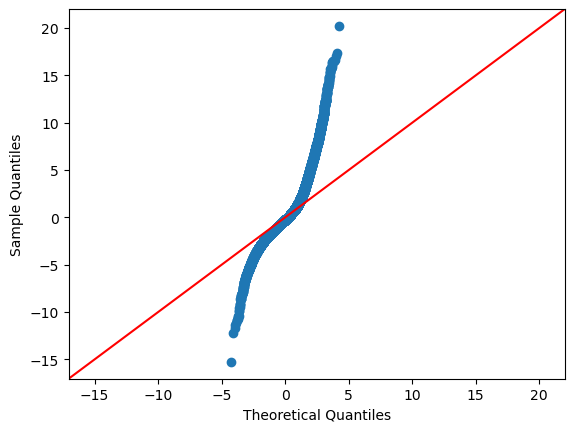

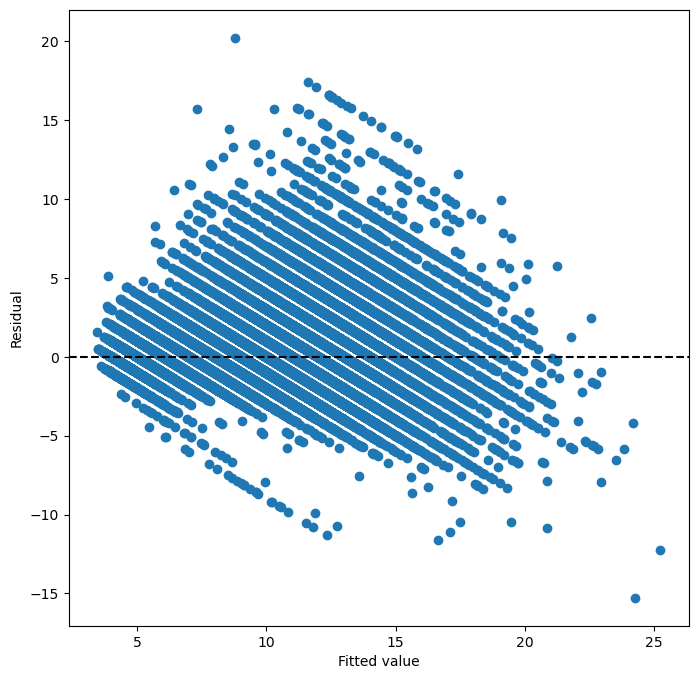

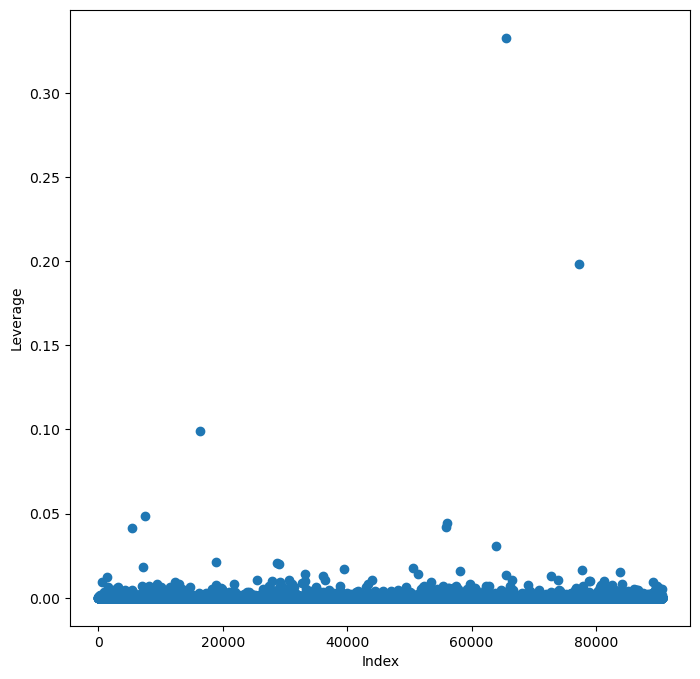

In [24]:
sm.qqplot(results.resid, line ='45') 

ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

### 2nd Degree, n = 'best'

Creating a new feature for "Tall Snails" to handle index 16384 and other leverage points.

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Sex_F,Sex_I,Sex_M,Tall
16384,16384,0.515,0.375,1.130,0.5720,0.2370,0.1455,0.1500,8,True,False,False,1
28651,28651,0.665,0.515,0.500,1.7825,0.5330,0.3340,0.4285,10,True,False,False,1
54423,54423,0.660,0.540,0.350,1.2635,0.5595,0.2435,0.4150,16,True,False,False,1
55852,55852,0.745,0.545,0.500,1.7875,0.8075,0.3935,0.5650,10,False,False,True,1
56089,56089,0.705,0.575,0.515,2.2100,1.1075,0.4865,0.5120,11,True,False,False,1
58048,58048,0.635,0.495,0.500,1.2615,0.5385,0.3050,0.3750,11,True,False,False,1
63851,63851,0.640,0.510,0.500,1.3715,0.5065,0.3050,0.4700,12,False,False,True,1
65464,65464,0.585,0.450,1.130,1.1000,0.5085,0.2425,0.2800,10,False,False,True,1
77326,77326,0.565,0.455,1.000,1.0145,0.5255,0.2440,0.2835,8,True,False,False,1


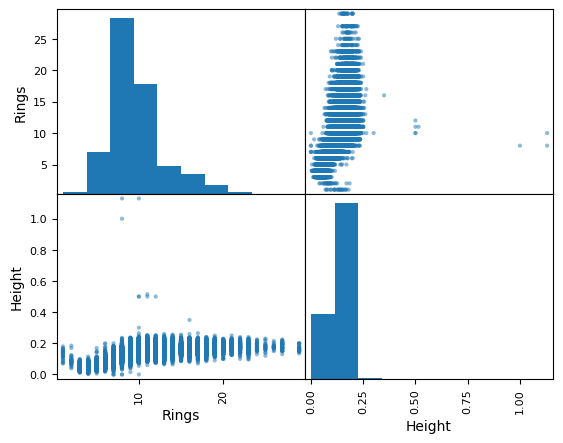

In [25]:
pd.plotting.scatter_matrix(abalone[['Rings',
                                   'Height']]);

abalone['Tall'] = 0
abalone.loc[abalone['Height'] > .25, 'Tall'] = 1

filtered_df = abalone.loc[abalone['Height'] > .3]
filtered_df

In [26]:
y = abalone['Rings']
X = abalone[['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Sex_F', 'Sex_M', 'Tall']]

polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X)
xPoly_names = polyFeatures.get_feature_names_out(X.columns)
Xnew = pd.DataFrame(xPoly, columns = xPoly_names)
#model = sm.OLS(y, Xnew)
#results = model.fit()
#results.summary()

# https://www.kaggle.com/code/jorijnsmit/linear-regression-by-sequential-feature-selection#Fitting-a-Linear-Regression-Model 
lr = LinearRegression()

# http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/#sequentialfeatureselector
sfs = SFS(lr,
          k_features='best',
          verbose=1,
          forward=True, 
          scoring='r2',
          cv=5,
          n_jobs=11)

sfs = sfs.fit(Xnew, y)




[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=11)]: Done  44 out of  65 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=11)]: Done  65 out of  65 | elapsed:    0.7s finished
Features: 1/65[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  35 tasks      | elapsed:    0.5s
[Parallel(n_jobs=11)]: Done  43 out of  64 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=11)]: Done  64 out of  64 | elapsed:    1.7s finished
Features: 2/65[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=11)]: Done  42 out of  63 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=11)]: Done  63 out of  63 | elapsed:    1.0s finished
Features: 3/65[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Paralle

In [27]:
X_sfs = sfs.transform(Xnew)

X_sfs_names = sfs.k_feature_idx_
X_sfs_names = Xnew.columns[list(X_sfs_names)]
print(X_sfs_names)

X_sfs = sm.add_constant(X_sfs)
model = sm.OLS(y, X_sfs)
results = model.fit()
results.summary()


Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Sex_F', 'Sex_M', 'Length^2',
       'Length Diameter', 'Length Height', 'Length Whole weight',
       'Length Whole weight.1', 'Length Shell weight', 'Length Sex_F',
       'Length Sex_M', 'Diameter^2', 'Diameter Height',
       'Diameter Whole weight.2', 'Diameter Shell weight', 'Height^2',
       'Height Whole weight.1', 'Height Whole weight.2', 'Height Shell weight',
       'Height Tall', 'Whole weight^2', 'Whole weight Whole weight.1',
       'Whole weight Shell weight', 'Whole weight Sex_F', 'Whole weight Sex_M',
       'Whole weight.1^2', 'Whole weight.1 Whole weight.2',
       'Whole weight.1 Shell weight', 'Whole weight.1 Sex_F',
       'Whole weight.1 Sex_M', 'Whole weight.1 Tall', 'Whole weight.2^2',
       'Whole weight.2 Shell weight', 'Whole weight.2 Sex_F',
       'Whole weight.2 Sex_M', 'Shell weight Sex_F', 'Shell weight Sex_M',
       'Sex_F^2', 'Sex_F Sex

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     3727.
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:02:12   Log-Likelihood:            -1.8715e+05
No. Observations:               90615   AIC:                         3.744e+05
Df Residuals:                   90571   BIC:                         3.748e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0358      0.209      0.172      0.864      -0.373       0.445
x1             7.8419      2.653      2.956      0.003       2.642      13.041
x2            27.1151      3.248      8.349      0.000      20.750      33.480
x3             8.2961      4.402      1.885      0.059      -0.331      16.924
x4             6.3543      1.230      5.165      0.000       3.943       8.765
x5           -16.7653      1.659    -10.104      0.000     -20.018     -13.513
x6             0.5982      3.179      0.188      0.851      -5.633       6.830
x7            14.2314      2.666      5.338      0.000       9.006      19.457
x8             0.9738      0.132      7.368      0.000       0.715       1.233
x9             0.1766      0.092      1.914      0.056      -0.004       0.357
x10           17.8053      9.660      1.843      0.065      -1.128      36.738
x11          -69.4899     21.862     -3.179      0.001    -112.340     -26.640
x12          -24.1049     25.039     -0.963      0.336     -73.181      24.972
x13           11.0462      3.035      3.640      0.000       5.098      16.994
x14            0.6179      4.150      0.149      0.882      -7.516       8.752
x15          -55.2516      8.973     -6.157      0.000     -72.839     -37.664
x16           -1.8237      0.735     -2.481      0.013      -3.264      -0.383
x17            1.7889      0.569      3.141      0.002       0.673       2.905
x18          -24.3374     14.883     -1.635      0.102     -53.508       4.833
x19           24.2556     31.061      0.781      0.435     -36.624      85.135
x20            6.7534      9.684      0.697      0.486     -12.227      25.734
x21           94.9892      9.008     10.545      0.000      77.333     112.645
x22           45.1127      4.934      9.143      0.000      35.442      54.784
x23          -69.5490      6.803    -10.223      0.000     -82.883     -56.215
x24          -34.7394     16.492     -2.106      0.035     -67.063      -2.416
x25          112.1613      9.412     11.917      0.000      93.714     130.608
x26          -53.1811      4.609    -11.540      0.000     -62.214     -44.148
x27           -0.7699      0.524     -1.468      0.142      -1.798       0.258
x28          -12.0700      1.343     -8.985      0.000     -14.703      -9.437
x29           -4.9570      1.616     -3.067      0.002      -8.125      -1.789
x30            2.7569      0.461      5.980      0.000       1.853       3.661
x31            2.6679      0.454      5.877      0.000       1.778       3.558
x32           30.8212      1.025     30.078      0.000      28.813      32.830
x33           14.7939      3.162      4.678      0.000       8.596      20.992
x34           -5.4963      2.537     -2.166      0.030     -10.469      -0.523
x35           -7.5641      0.594    -12.743      0.000      -8.728      -6.401
x3

16384

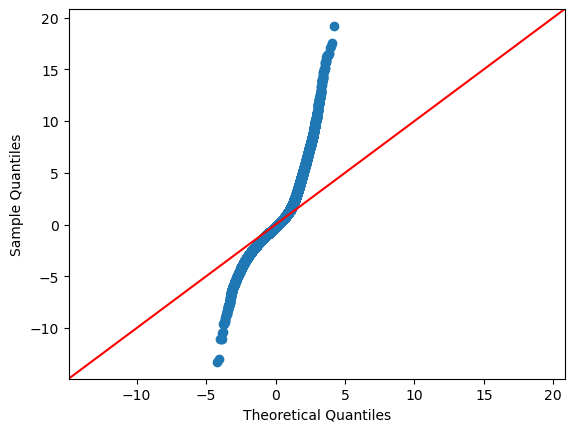

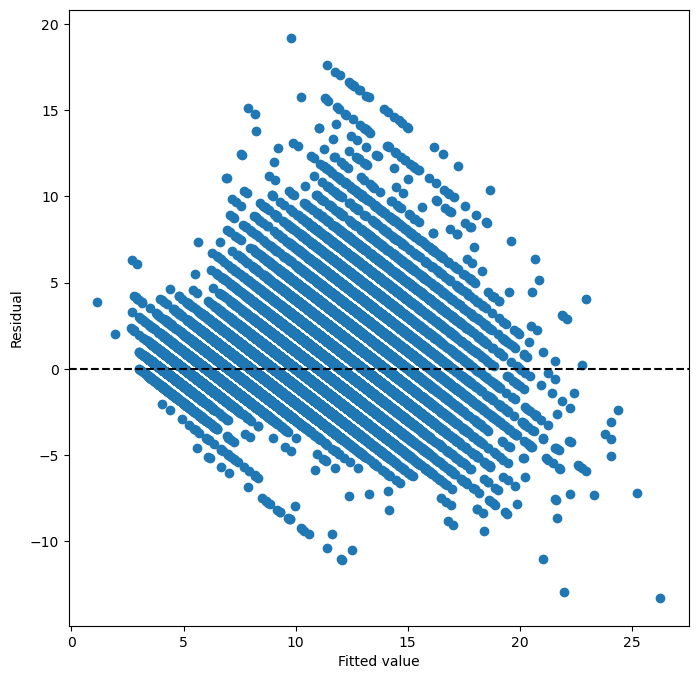

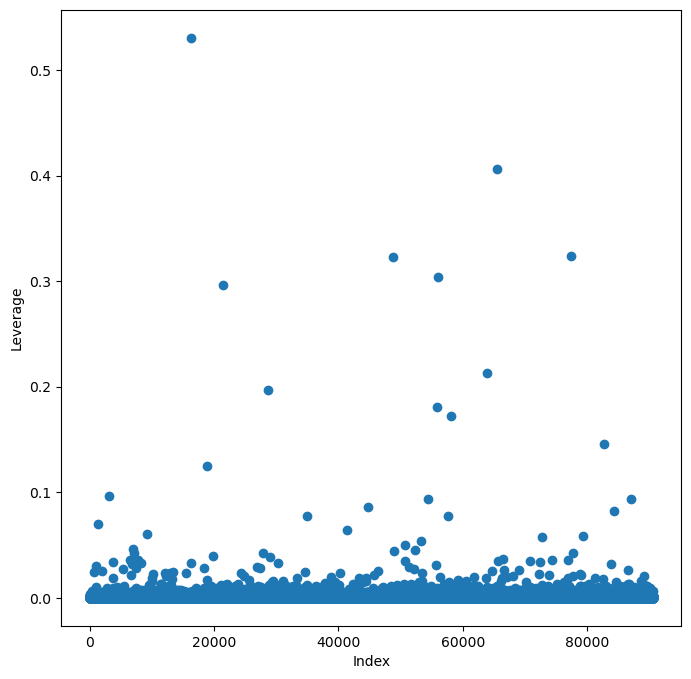

In [28]:
sm.qqplot(results.resid, line ='45') 

ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [29]:
abalone.iloc[16384]

abalone['Lever'] = 0
abalone.loc[infl.hat_matrix_diag > .1, 'Lever'] = 1

abalone['Lever']

0        0
1        0
2        0
3        0
4        0
        ..
90610    0
90611    0
90612    0
90613    0
90614    0
Name: Lever, Length: 90615, dtype: int64

In [30]:
import seaborn as sns


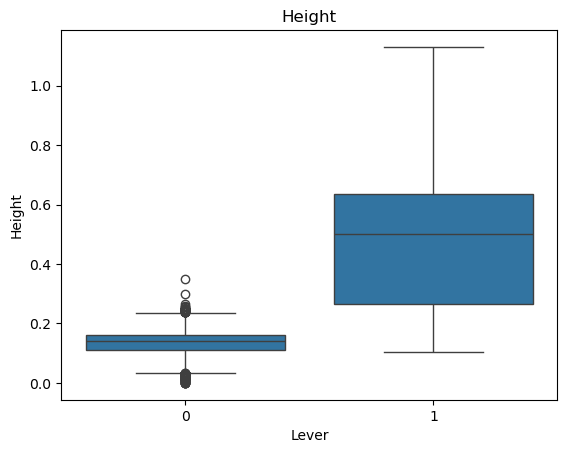

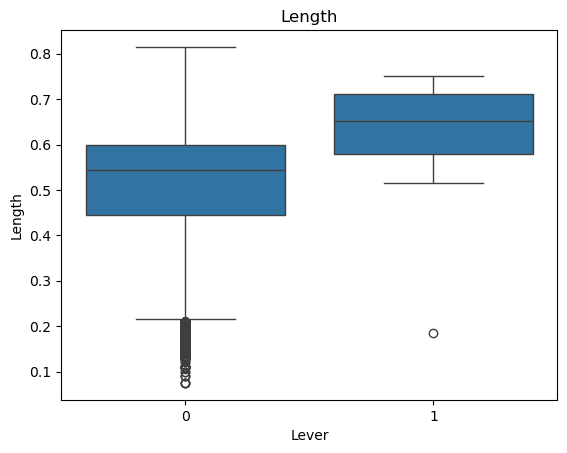

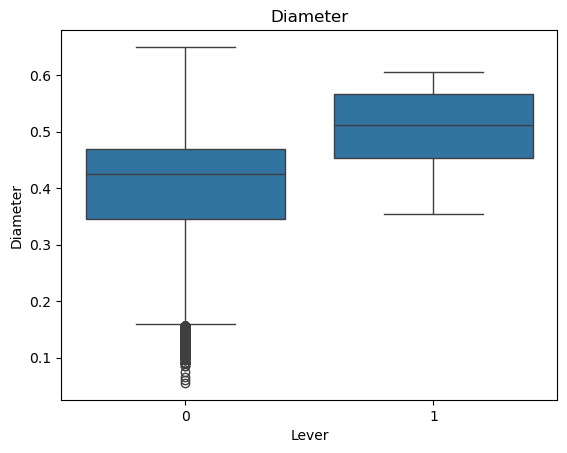

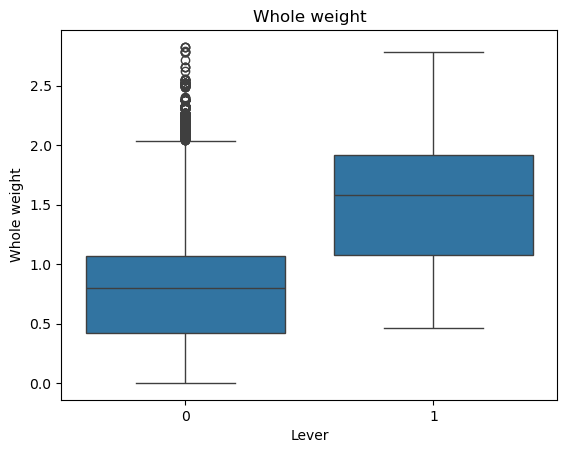

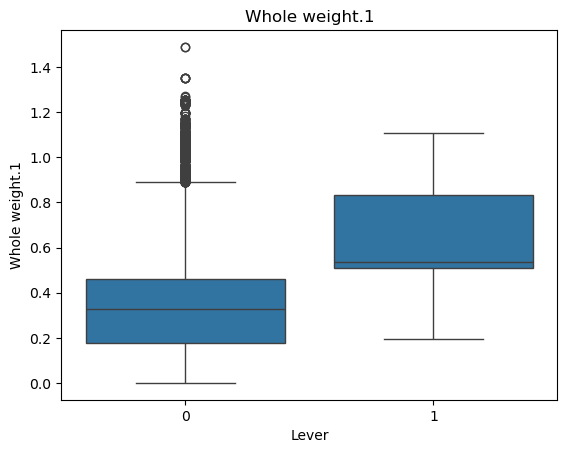

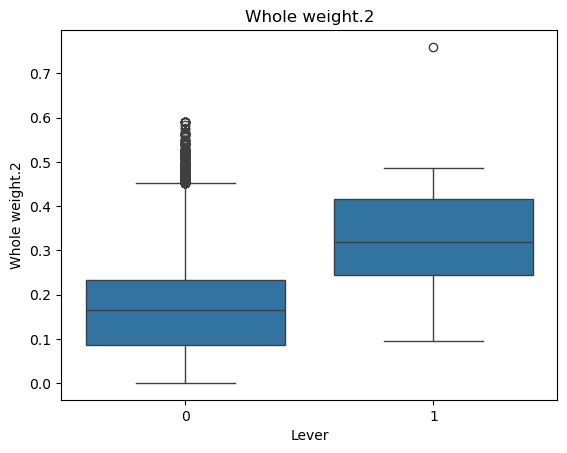

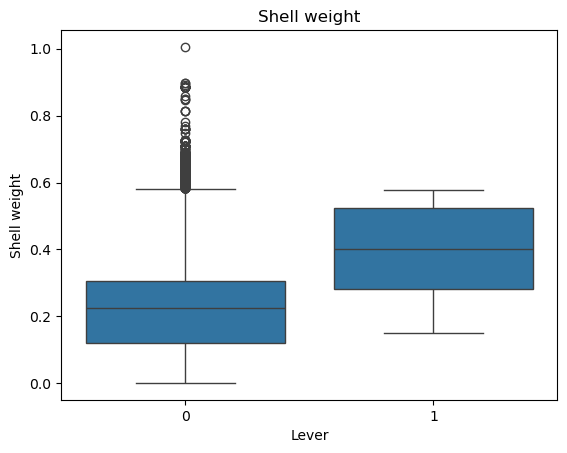

In [31]:
sns.boxplot(y = 'Height', x='Lever', data = abalone)
plt.title("Height")
plt.show()
sns.boxplot(y = 'Length', x='Lever', data = abalone)
plt.title("Length")
plt.show()
sns.boxplot(y = 'Diameter', x='Lever', data = abalone)
plt.title("Diameter")
plt.show()
sns.boxplot(y = 'Whole weight', x='Lever', data = abalone)
plt.title("Whole weight")
plt.show()
sns.boxplot(y = 'Whole weight.1', x='Lever', data = abalone)
plt.title("Whole weight.1")
plt.show()
sns.boxplot(y = 'Whole weight.2', x='Lever', data = abalone)
plt.title("Whole weight.2")
plt.show()
sns.boxplot(y = 'Shell weight', x='Lever', data = abalone)
plt.title("Shell weight")
plt.show()

### Applying the Model to Test Data

### 4rd Degree, n = 5

In [33]:
y = abalone['Rings']
X = abalone[['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Sex_F', 'Sex_M', 'Tall']]

polyFeatures = PolynomialFeatures(degree=4, include_bias=False)
xPoly = polyFeatures.fit_transform(X)
xPoly_names = polyFeatures.get_feature_names_out(X.columns)
Xnew = pd.DataFrame(xPoly, columns = xPoly_names)
#model = sm.OLS(y, Xnew)
#results = model.fit()
#results.summary()

# https://www.kaggle.com/code/jorijnsmit/linear-regression-by-sequential-feature-selection#Fitting-a-Linear-Regression-Model 
lr = LinearRegression()

# http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/#sequentialfeatureselector
sfs = SFS(lr,
          k_features=5,
          verbose=1,
          forward=True, 
          scoring='r2',
          cv=5,
          n_jobs=10)

sfs = sfs.fit(Xnew, y)




[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    3.7s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    9.7s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   20.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   34.8s
[Parallel(n_jobs=10)]: Done 1000 out of 1000 | elapsed:   44.0s finished
Features: 1/5[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    1.7s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    9.3s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   24.9s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   50.2s
[Parallel(n_jobs=10)]: Done 999 out of 999 | elapsed:  1.0min finished
Features: 2/5[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.0s
[Parallel(n_jobs=10)]: Done 180 tasks    

In [36]:
X_sfs = sfs.transform(Xnew)

X_sfs_names = sfs.k_feature_idx_
X_sfs_names = Xnew.columns[list(X_sfs_names)]
print(X_sfs_names)

X_sfs = sm.add_constant(X_sfs)
model = sm.OLS(y, X_sfs)
results = model.fit()
results.summary()


Index(['Height', 'Shell weight', 'Length^2 Whole weight.1',
       'Whole weight.1^2 Shell weight', 'Length Whole weight.1^3'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                 2.842e+04
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:23:47   Log-Likelihood:            -1.9057e+05
No. Observations:               90615   AIC:                         3.811e+05
Df Residuals:                   90609   BIC:                         3.812e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5157      0.035    101.081      0.000       3.447       3.584
x1            12.9896      0.452     28.759      0.000      12.104      13.875
x2            36.6127      0.216    169.578      0.000      36.189      37.036
x3           -31.6872      0.274   -115.746      0.000     -32.224     -31.151
x4           -24.1927      0.532    -45.517      0.000     -25.234     -23.151
x5            21.3958      0.380     56.260      0.000      20.650      22.141
==============================================================================
Omnibus:                    31956.428   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           195296.078
Skew:                           1.570   Prob(JB):                         0.00
Kurtosis:                       9.471   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

16384

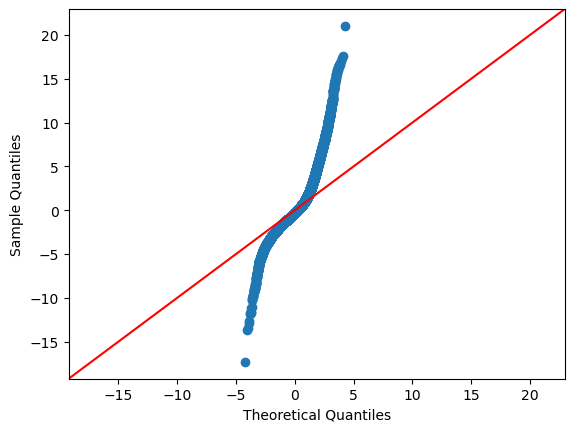

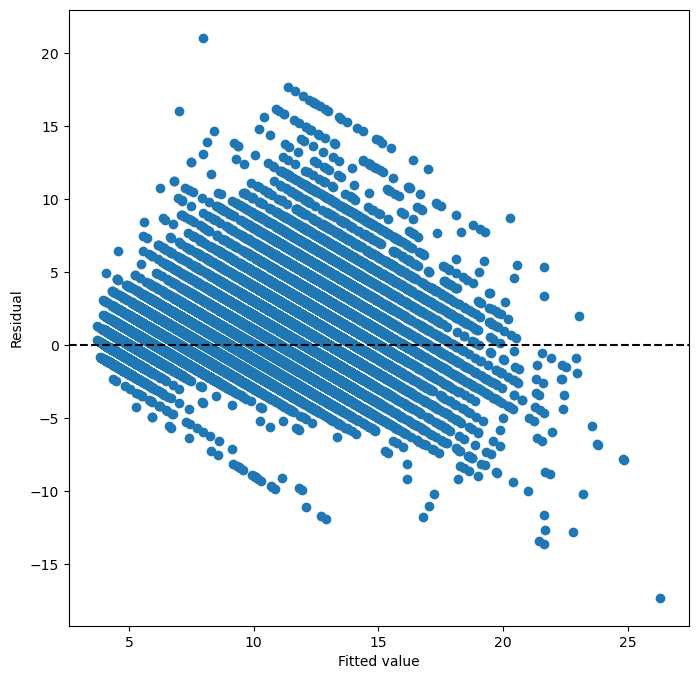

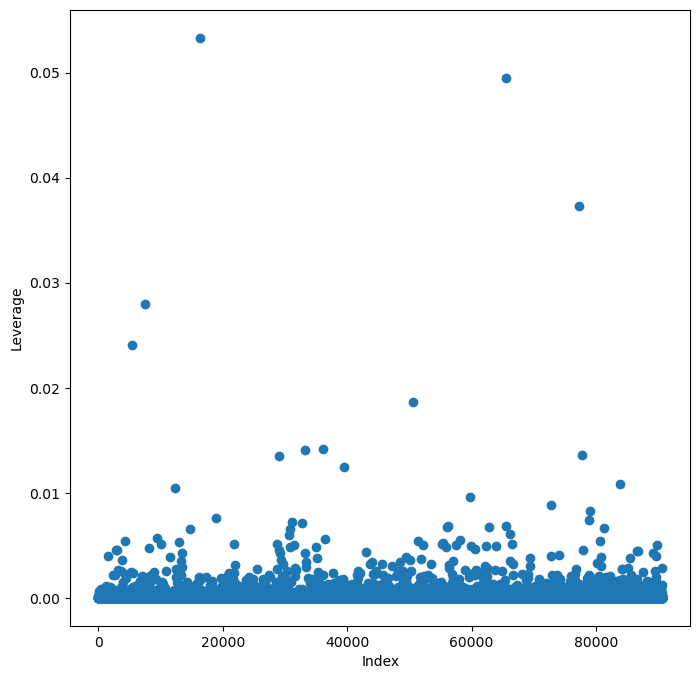

In [37]:
sm.qqplot(results.resid, line ='45') 

ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

Increasing the degree to 4 does not appear to improve the model based on 5 interations. 

### 5th Degree, n = 3

In [65]:
y = abalone['Rings']
X = abalone[['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Sex_F', 'Sex_M', 'Tall']]

polyFeatures = PolynomialFeatures(degree=5, include_bias=False)
xPoly = polyFeatures.fit_transform(X)
xPoly_names = polyFeatures.get_feature_names_out(X.columns)
Xnew = pd.DataFrame(xPoly, columns = xPoly_names)
#model = sm.OLS(y, Xnew)
#results = model.fit()
#results.summary()

# https://www.kaggle.com/code/jorijnsmit/linear-regression-by-sequential-feature-selection#Fitting-a-Linear-Regression-Model 
lr = LinearRegression()

# http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/#sequentialfeatureselector
sfs = SFS(lr,
          k_features=3,
          verbose=1,
          forward=True, 
          scoring='r2',
          cv=5,
          n_jobs=11)

sfs = sfs.fit(Xnew, y)




[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    3.4s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:   12.5s
[Parallel(n_jobs=11)]: Done 428 tasks      | elapsed:   27.1s
[Parallel(n_jobs=11)]: Done 778 tasks      | elapsed:   48.1s
[Parallel(n_jobs=11)]: Done 1228 tasks      | elapsed:  1.3min
[Parallel(n_jobs=11)]: Done 1778 tasks      | elapsed:  1.9min
[Parallel(n_jobs=11)]: Done 2428 tasks      | elapsed:  2.6min
[Parallel(n_jobs=11)]: Done 3002 out of 3002 | elapsed:  3.2min finished
Features: 1/3[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    3.7s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:   15.1s
[Parallel(n_jobs=11)]: Done 428 tasks      | elapsed:   34.2s
[Parallel(n_jobs=11)]: Done 778 tasks      | elapsed:  1.1min
[Parallel(n_jobs=11)]: Done 1228 tasks      | elapsed:  1.8min
[Parallel(n_

In [71]:
X_sfs = sfs.transform(Xnew)

X_sfs_names = sfs.k_feature_idx_
X_sfs_names = Xnew.columns[list(X_sfs_names)]
print(X_sfs_names)

X_sfs = sm.add_constant(X_sfs)
model = sm.OLS(y, X_sfs)
results = model.fit()
results.summary()


Index(['Height', 'Shell weight', 'Length^2 Whole weight.1'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                 4.460e+04
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:22:09   Log-Likelihood:            -1.9221e+05
No. Observations:               90615   AIC:                         3.844e+05
Df Residuals:                   90611   BIC:                         3.845e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6268      0.035    104.838      0.000       3.559       3.695
x1            17.1288      0.413     41.508      0.000      16.320      17.938
x2            28.4327      0.159    178.606      0.000      28.121      28.745
x3           -22.7043      0.147   -154.047      0.000     -22.993     -22.415
==============================================================================
Omnibus:                    31669.886   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           194956.247
Skew:                           1.551   Prob(JB):                         0.00
Kurtosis:                       9.482   Cond. No.                         66.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

16384

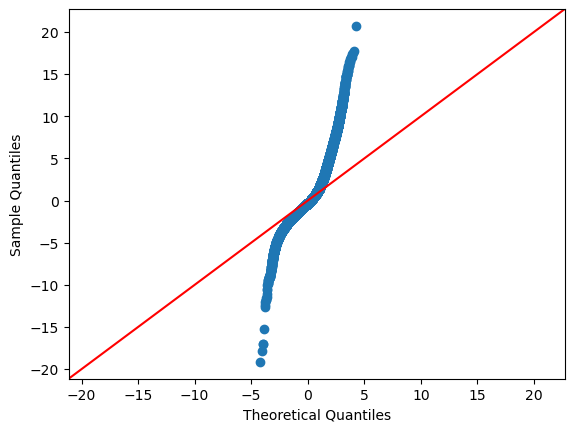

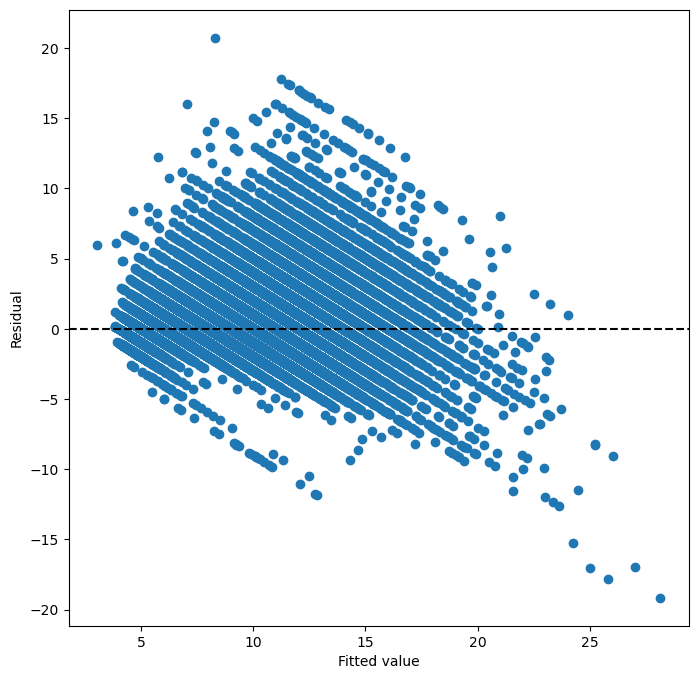

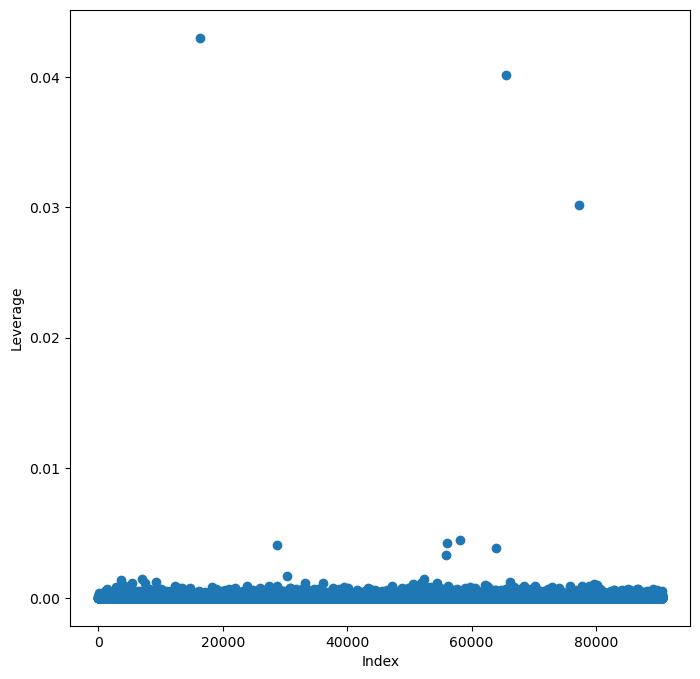

In [72]:
sm.qqplot(results.resid, line ='45') 

ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [73]:
abalone.iloc[65464]

abalone['Lever'] = 0
abalone.loc[infl.hat_matrix_diag > .01, 'Lever'] = 1



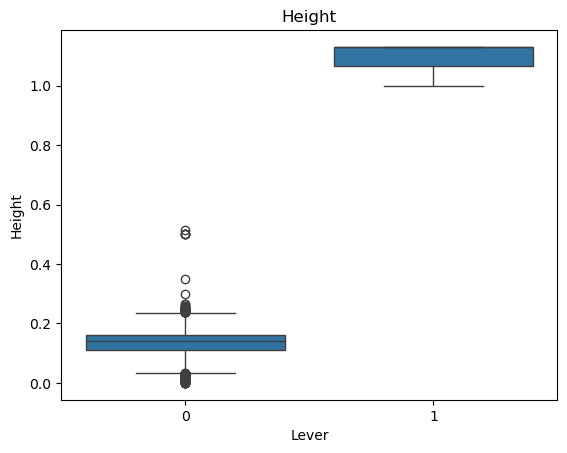

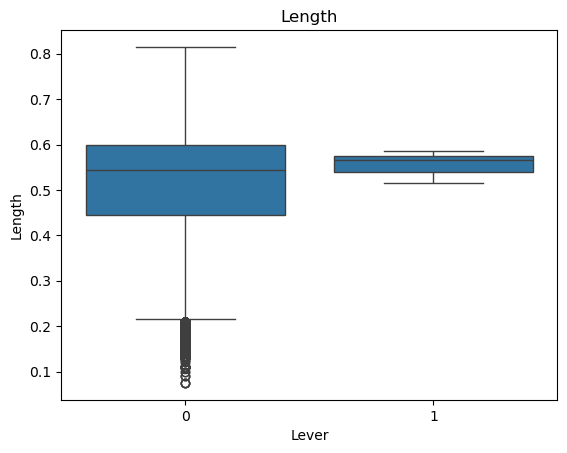

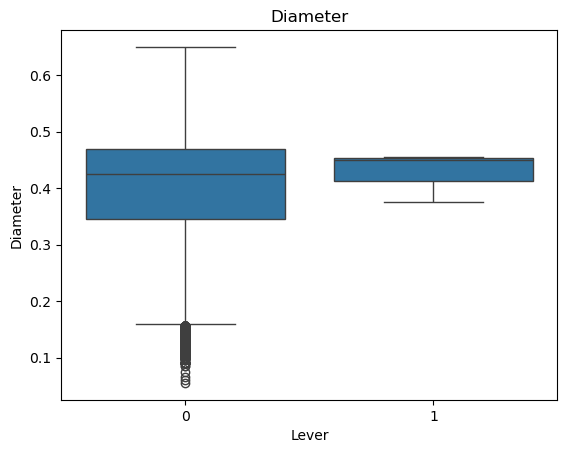

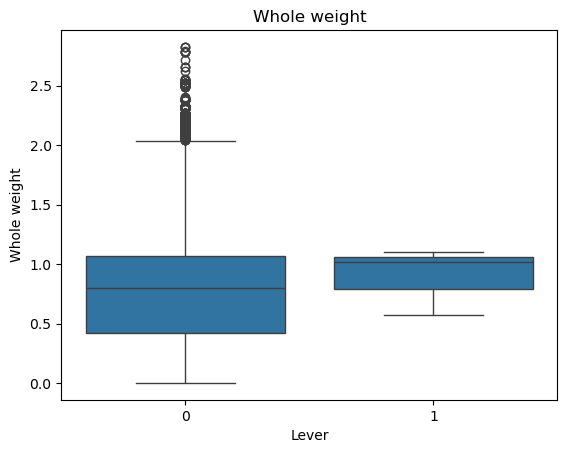

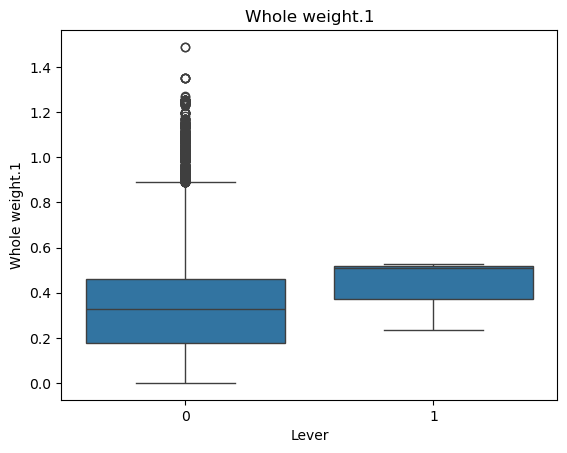

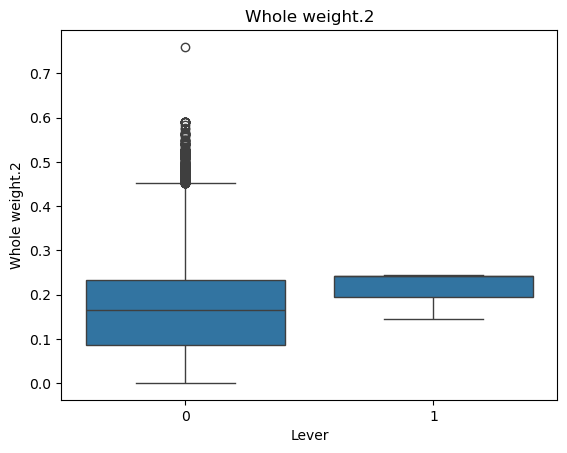

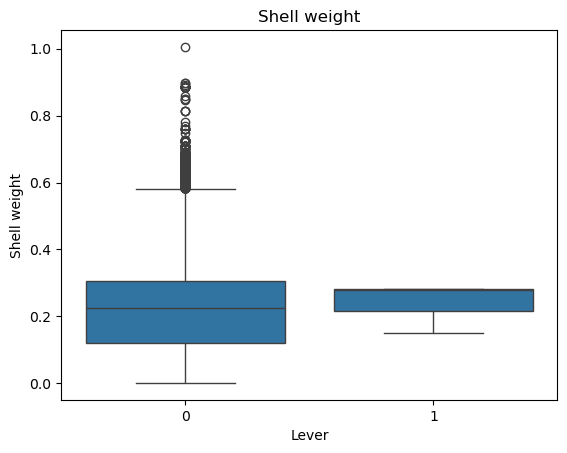

In [74]:
sns.boxplot(y = 'Height', x='Lever', data = abalone)
plt.title("Height")
plt.show()
sns.boxplot(y = 'Length', x='Lever', data = abalone)
plt.title("Length")
plt.show()
sns.boxplot(y = 'Diameter', x='Lever', data = abalone)
plt.title("Diameter")
plt.show()
sns.boxplot(y = 'Whole weight', x='Lever', data = abalone)
plt.title("Whole weight")
plt.show()
sns.boxplot(y = 'Whole weight.1', x='Lever', data = abalone)
plt.title("Whole weight.1")
plt.show()
sns.boxplot(y = 'Whole weight.2', x='Lever', data = abalone)
plt.title("Whole weight.2")
plt.show()
sns.boxplot(y = 'Shell weight', x='Lever', data = abalone)
plt.title("Shell weight")
plt.show()

### Apply to Test Data

In [82]:
test = pd.read_csv('test.csv')

test = pd.get_dummies(test, columns=['Sex'], drop_first = False)
test

test['Tall'] = 0
test.loc[test['Height'] > .25, 'Tall'] = 1


XTest = test[['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Sex_F', 'Sex_M', 'Tall']]

polyFeatures = PolynomialFeatures(degree=5, include_bias=False)
xPoly = polyFeatures.fit_transform(XTest)
xPoly_names = polyFeatures.get_feature_names_out(XTest.columns)
XTest = pd.DataFrame(xPoly, columns = xPoly_names)
XTest = sfs.transform(XTest)
XTest = sm.add_constant(XTest)


Rings = np.round(results.predict(XTest), 0)

output = pd.DataFrame(test[['id']])
output['Rings'] = Rings
print(output)
output.to_csv('model2.csv', index = False)


           id  Rings
0       90615    9.0
1       90616   11.0
2       90617   10.0
3       90618   10.0
4       90619    8.0
...       ...    ...
60406  151021    6.0
60407  151022   10.0
60408  151023   11.0
60409  151024   13.0
60410  151025    8.0

[60411 rows x 2 columns]
